In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [24]:
def det_dims(X):
    for dim in range(1, 11):
        gmm = GaussianMixture(dim)
        gmm.fit(X)

        temp_bic = gmm.bic(X)
        print(dim, temp_bic)

        if dim == 1:
            bic = temp_bic
            n_dim = dim

        else:
            if temp_bic < bic:
                bic = temp_bic
                n_dim = dim

    print(f'\n\nLowest number of dimensions needed are {n_dim} with the BIC of: {bic}')

    return n_dim

In [28]:
dim = det_dims(X)

gmm = GaussianMixture(dim)
gmm.fit(X)
k_means = KMeans(dim)

y_pred_gmm = gmm.fit_predict(X)
y_pred_kmeans = k_means.fit_predict(X)

1 829.9781545093944
2 574.017832720746
3 580.8594247694393
4 622.1960484009368
5 687.5011887192668
6 729.0789842746331
7 759.5478398965292
8 773.9880624997272
9 847.4166353859434
10 841.8615979081326


Lowest number of dimensions needed are 2 with the BIC of: 574.017832720746


In [34]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['component 1', 'component 2'])

pca_df['target'] = y
pca_df['target_gmm'] = y_pred_gmm
pca_df['target_kmeans'] = y_pred_kmeans

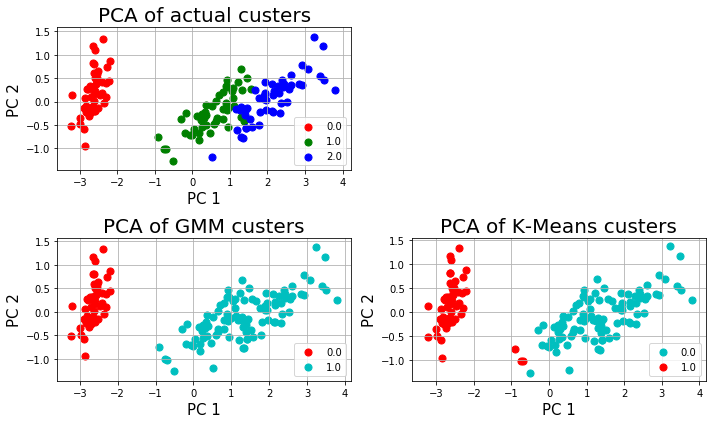

In [48]:
fig = plt.figure(figsize = (10,6))

ax = fig.add_subplot(221) 

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA of actual custers', fontsize = 20)

y_vals = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']

for target, color in zip(y_vals, colors):
    class_index = pca_df['target'] == target
    ax.scatter(pca_df.loc[class_index, 'component 1'],
               pca_df.loc[class_index, 'component 2'],
               c = color,
               s = 50
              )

ax.legend(y_vals)
ax.grid()


ax = fig.add_subplot(223) 

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA of GMM custers', fontsize = 20)

y_vals = [0.0, 1.0]
colors = ['r', 'c']

for target, color in zip(y_vals, colors):
    class_index = pca_df['target_gmm'] == target
    ax.scatter(pca_df.loc[class_index, 'component 1'],
               pca_df.loc[class_index, 'component 2'],
               c = color,
               s = 50
              )

ax.legend(y_vals)
ax.grid()


ax = fig.add_subplot(224) 

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA of K-Means custers', fontsize = 20)

y_vals = [0.0, 1.0]
colors = ['c', 'r']

for target, color in zip(y_vals, colors):
    class_index = pca_df['target_kmeans'] == target
    ax.scatter(pca_df.loc[class_index, 'component 1'],
               pca_df.loc[class_index, 'component 2'],
               c = color,
               s = 50
              )

ax.legend(y_vals)
ax.grid()

plt.tight_layout()
plt.show()